## Week 1: Inverse transform method

### Generate random numbers with Uniform distribution

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math

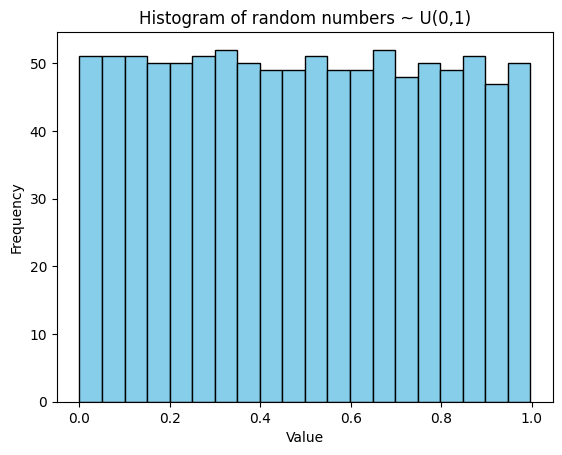

In [49]:
def generate_uniform_samples(N, m=2**10, a = 1103515, c = 12345, X = 5):
    U = []
    for i in range(N):
        X = (a*X+c)%m
        output = X/m
        U.append(output)
    return U

#main
m = 2**10  # Số nguyên lớn
a = 1103515 # Thừa số nguyên
c = 12345     # Hằng số nguyên
X = 5   # Số nguyên khởi tạo
N = 1000   # Số lượng số ngẫu nhiên cần tạo

uniform_samples = generate_uniform_samples(N)
plt.hist(uniform_samples, bins=20, color = 'skyblue', edgecolor='black')
plt.title("Histogram of random numbers ~ U(0,1)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Apply the Inverse transform method to create random numbers with 3 types of distribution

**Create random numbers with Exponential distribution** 

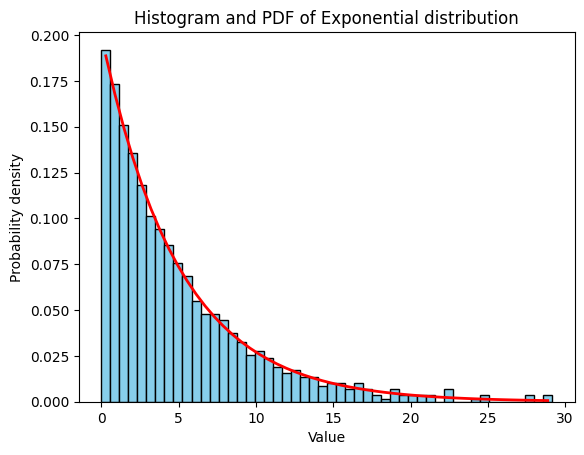

In [50]:
# Exponential distribution
def inverse_cdf_exponential(U, lamda, num_bins):
    
    # calculate inverse CDF
    icdf = []
    for i in range(len(U)):
        icdf.append(np.log(1-U[i])/(-lamda))
        
    #calculate PDF
    hist, bin_edges = np.histogram(icdf, bins=num_bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    x = list(bin_centers)
    pdf = [0]*len(x)
    for i in range(len(x)):
        pdf[i] = lamda*np.exp(-lamda*x[i])
    
    return icdf, x, pdf, num_bins

def plot_histogram(icdf, x, pdf, num_bins, dist):
    
    #plot histogram and pdf
    plt.hist(icdf, density=True, bins = num_bins, color = 'skyblue', edgecolor='black')
    plt.plot(x, pdf, 'r-', lw=2)
    plt.title(f'Histogram and PDF of {dist} distribution')
    plt.xlabel('Value')
    plt.ylabel('Probability density')
        

# define parameter
lamda_exp  = 0.2
num_bins = 50
dist_exp = 'Exponential'
# calculate inverse CDF and PDF
icdf_exp, x_exp, pdf_exp, num_bins_exp = inverse_cdf_exponential(uniform_samples, lamda_exp, num_bins)
# plot histogram
plot_histogram(icdf_exp, x_exp, pdf_exp, num_bins_exp, dist_exp)


**Create random numbers with Logistic distribution** 

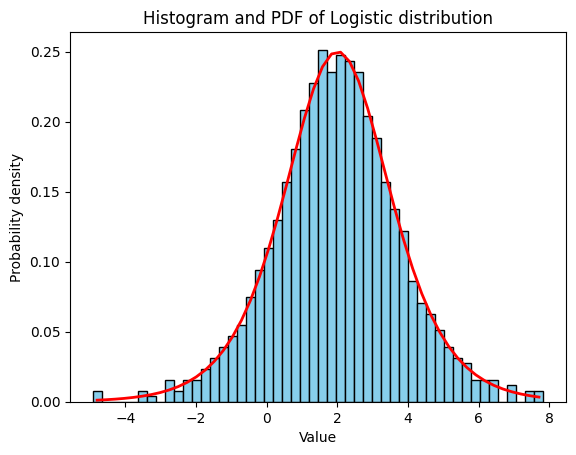

In [51]:
def inverse_cdf_logistic(U, mu, s, num_bins):
    
    # calculate inverse CDF
    icdf=[]
    for u in U:
        if u != 1 and u != 0:
            t = mu + s * np.log(u / (1 - u))
            icdf.append(t)
            
    #get bin_centers
    hist, bin_edges = np.histogram(icdf, bins=num_bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    #calculate PDF
    x = list(bin_centers)
    pdf = [0]*len(x)
    for i in range(len(x)):
        pdf[i] = np.exp(-(x[i]-mu)/s)/(s * (1+np.exp(-(x[i]-mu)/s))**2)
    return icdf, x, pdf, num_bins

# define parameter
mu = 2
s = 1
num_bins_log = 50
dist_log = 'Logistic'
# calculate inverse CDF and PDF
icdf_log, x_log, pdf_log, num_bins_log = inverse_cdf_logistic(uniform_samples, mu, s, num_bins_log)

# plot histogram
plot_histogram(icdf_log, x_log, pdf_log, num_bins_log, dist_log)


**Create random numbers with Weibull distribution** 

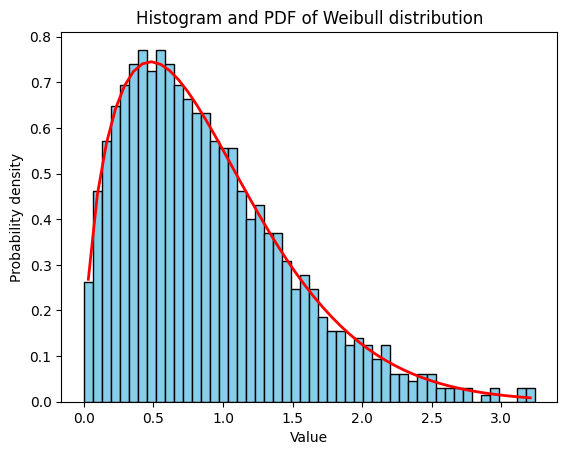

In [52]:
def inverse_cdf_weibull(U, lamda, k, num_bins):
    icdf = []
    for u in U:
        if u != 1:
            t = lamda*((-math.log(1-u))**(1/k))
            icdf.append(t)
            
    #get bin_centers
    hist, bin_edges = np.histogram(icdf, bins=num_bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    #calculate PDF
    x = bin_centers
    pdf = (k/lamda)*((x/lamda)**(k-1))*np.exp(-(x/lamda)**k)
    return icdf, x, pdf, num_bins

# define parameter
lamda_wei = 1
k_wei = 1.5
num_bins_wei = 50
dist_wei = 'Weibull'

# calculate inverse CDF and PMF
icdf_wei, x_wei, pdf_wei, num_bins_wei = inverse_cdf_weibull(uniform_samples, lamda_wei, k_wei, num_bins_wei)
# plot histogram
plot_histogram(icdf_wei, x_wei, pdf_wei, num_bins_wei, dist_wei)

### Choose Bin Sizes for Histograms

In [53]:
def calculate_bins(data, rule='custom', bin_width=10):
    n = len(data)
    if n <= 1:
        return 1
    rule = rule.lower() 
    
    if rule == "sturges":
        return int(math.ceil(1 + math.log2(n)))
    
    elif rule == "scott":
        std_dev = np.std(data, ddof=1)
        bin_width = (3.5 * std_dev) / (n ** (1/3))
        return int(math.ceil((max(data) - min(data)) / bin_width))
    
    elif rule == "doane":
        skewness = ((np.mean(data - np.mean(data)) ** 3) / n) / ((np.mean((data - np.mean(data)) ** 2) / n) ** (3/2))
        sigma_g1 = math.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
        return int(math.ceil(1 + math.log2(n) + math.log2(1 + abs(skewness) / sigma_g1)))

    elif rule == "freedman":
        iqr = np.percentile(data, 75) - np.percentile(data, 25)
        bin_width = (2 * iqr) / (n ** (1/3))
        return int(math.ceil((max(data) - min(data)) / bin_width))
    
    elif rule == "rice":
        return int(math.ceil(2 * n ** (1/3)))
    
    elif rule == "custom":
        return int(math.ceil((max(data) - min(data)) / bin_width))

    else:
        return 1


In [54]:
rules = ["Sturges", "Scott", "Doane", "Freedman", "Rice", "Custom"]
bins_exp = [calculate_bins(icdf_exp, rule) for rule in rules]
bins_log = [calculate_bins(icdf_log, rule) for rule in rules]
bins_wei = [calculate_bins(icdf_wei, rule) for rule in rules]

**Histogram and PDF of Exponential distribution with different bin rules** 

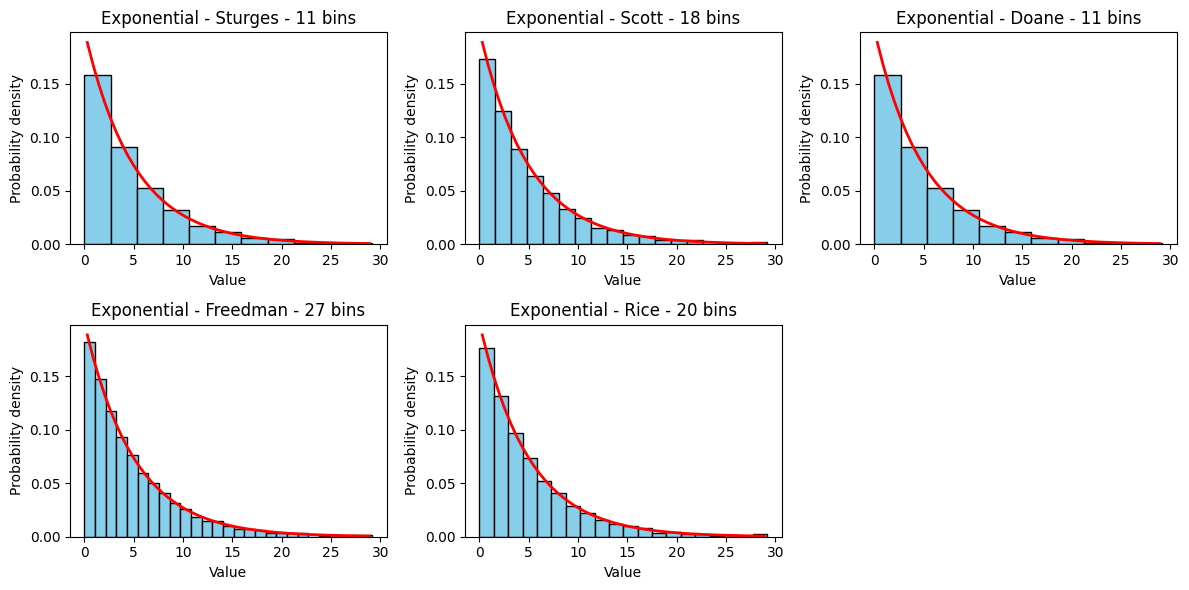

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(2,3,1)
plot_histogram(icdf_exp, x_exp, pdf_exp, bins_exp[0], dist_exp)
plt.title(f'{dist_exp} - {rules[0]} - {bins_exp[0]} bins')
plt.subplot(2,3,2)
plot_histogram(icdf_exp, x_exp, pdf_exp, bins_exp[1], dist_exp)
plt.title(f'{dist_exp} - {rules[1]} - {bins_exp[1]} bins')
plt.subplot(2,3,3)
plot_histogram(icdf_exp, x_exp, pdf_exp, bins_exp[2], dist_exp)
plt.title(f'{dist_exp} - {rules[2]} - {bins_exp[2]} bins')
plt.subplot(2,3,4)
plot_histogram(icdf_exp, x_exp, pdf_exp, bins_exp[3], dist_exp)
plt.title(f'{dist_exp} - {rules[3]} - {bins_exp[3]} bins')
plt.subplot(2,3,5)
plot_histogram(icdf_exp, x_exp, pdf_exp, bins_exp[4], dist_exp)
plt.title(f'{dist_exp} - {rules[4]} - {bins_exp[4]} bins')
plt.tight_layout()

**Histogram and PDF of Logistic distribution with different bin rules** 

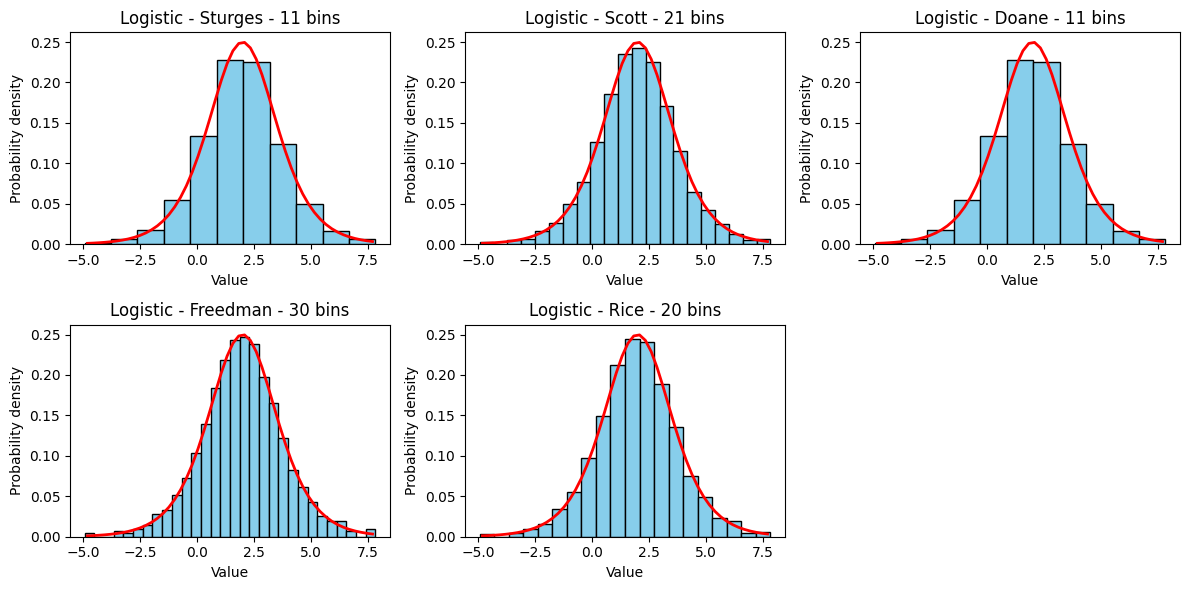

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(2,3,1)
plot_histogram(icdf_log, x_log, pdf_log, bins_log[0], dist_log)
plt.title(f'{dist_log} - {rules[0]} - {bins_log[0]} bins')
plt.subplot(2,3,2)
plot_histogram(icdf_log, x_log, pdf_log, bins_log[1], dist_log)
plt.title(f'{dist_log} - {rules[1]} - {bins_log[1]} bins')
plt.subplot(2,3,3)
plot_histogram(icdf_log, x_log, pdf_log, bins_log[2], dist_log)
plt.title(f'{dist_log} - {rules[2]} - {bins_log[2]} bins')
plt.subplot(2,3,4)
plot_histogram(icdf_log, x_log, pdf_log, bins_log[3], dist_log)
plt.title(f'{dist_log} - {rules[3]} - {bins_log[3]} bins')
plt.subplot(2,3,5)
plot_histogram(icdf_log, x_log, pdf_log, bins_log[4], dist_log)
plt.title(f'{dist_log} - {rules[4]} - {bins_log[4]} bins')
plt.tight_layout()

**Histogram and PDF of Weibull distribution with different bin rules** 

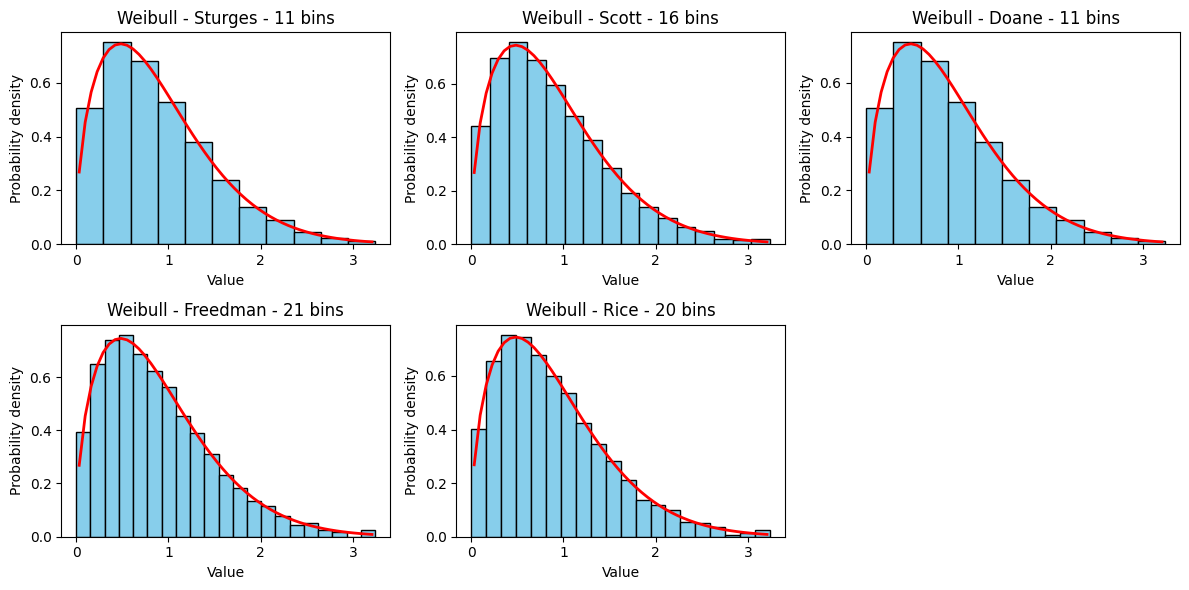

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(2,3,1)
plot_histogram(icdf_wei, x_wei, pdf_wei, bins_wei[0], dist_wei)
plt.title(f'{dist_wei} - {rules[0]} - {bins_wei[0]} bins')
plt.subplot(2,3,2)
plot_histogram(icdf_wei, x_wei, pdf_wei, bins_wei[1], dist_wei)
plt.title(f'{dist_wei} - {rules[1]} - {bins_wei[1]} bins')
plt.subplot(2,3,3)
plot_histogram(icdf_wei, x_wei, pdf_wei, bins_wei[2], dist_wei)
plt.title(f'{dist_wei} - {rules[2]} - {bins_wei[2]} bins')
plt.subplot(2,3,4)
plot_histogram(icdf_wei, x_wei, pdf_wei, bins_wei[3], dist_wei)
plt.title(f'{dist_wei} - {rules[3]} - {bins_wei[3]} bins')
plt.subplot(2,3,5)
plot_histogram(icdf_wei, x_wei, pdf_wei, bins_wei[4], dist_wei)
plt.title(f'{dist_wei} - {rules[4]} - {bins_wei[4]} bins')
plt.tight_layout()